In [1]:
import cv2 #import the library 
import numpy as np

import matplotlib.pyplot as plt


import tensorflow as tf
from statistics import *
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import img_to_array

cap = cv2.VideoCapture(0) # capture the webcam
cap.set(3, 640) ## define the dimensions
cap.set(4, 480)



Using TensorFlow backend.


True

In [2]:
def getContours(img,original_img):
    
    contours,hierachy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        
        area = cv2.contourArea(cnt)
       
        if area > 60000:
            cv2.drawContours(original_img,cnt,-1,(0,255,0),2)
            #print(area)
            
            peri = cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            ax = approx.item(0)
            ay = approx.item(1)
            bx = approx.item(2)
            by = approx.item(3)
            cx = approx.item(4)
            cy = approx.item(5)
            dx = approx.item(6)
            dy = approx.item(7)
            
            width,height= 900,900

            pts1 = np.float32([[bx,by],[ax,ay],[cx,cy],[dx,dy]])
            pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

            matrix = cv2.getPerspectiveTransform(pts1,pts2)
            img_perspective = cv2.warpPerspective(original_img,matrix,(width,height))
            img_corners = cv2.cvtColor(img_perspective,cv2.COLOR_BGR2GRAY)
            
            # Turn into a binary image
            for x in range(0, 900):
                for y in range(0, 900):
                    if img_corners[x][y]<100:
                        img_corners[x][y]=0
                    else:
                        img_corners[x][y]=255
                        
            cv2.imshow('Corners',img_corners)
            
            classify(img_corners)
            
      

In [3]:
def classify(Img):
     
    DATADROP = "C://IMG//"
    crop_val = 20
    
    
    for i in range(0, 9):
        for j in range(0, 9):
            
                
            J = j+1
            I = i+1
            cell = Img[I*100 - 100 + crop_val : I*100 - crop_val , J*100 - 100 + crop_val : J*100 - crop_val]

            img_canny = cv2.Canny(cell, 50, 50)

            contours, hierachy = cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

            for cnt in contours:
                area = cv2.contourArea(cnt)

                if area > 5:

                    peri = cv2.arcLength(cnt, True)
                    approx = cv2.approxPolyDP(cnt, 0.02*peri, True)

                    x,y,w,h = cv2.boundingRect(approx)

                    image_rect = cell[y:y+h, x:x+w]
                    image_rect = cv2.resize(image_rect, (100, 100))

                    image_num = img_to_array(image_rect)

                    image_num = np.array(image_num).reshape(-1, 100 , 100,1)
                    image_num = image_num.astype('float32')
                    image_num = image_num / 255.0

                    model = tf.keras.models.load_model('sudoku_model_ytb.h5')
                    digit = int(model.predict_classes(image_num))
                    prediction = model.predict(image_num)
                    prob = np.amax(prediction)
                    plt.imshow(image_rect, cmap='gray')
                    plt.show()
                    print("Detected: ",digit)
                    print("Probability: ",prob)
                

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


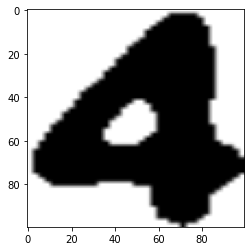

Detected:  4
Probability:  0.9999982


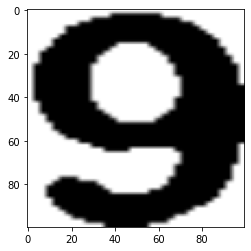

Detected:  9
Probability:  0.9999994


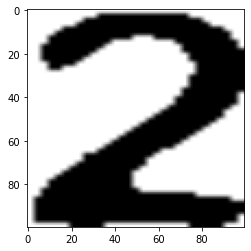

Detected:  2
Probability:  0.999936


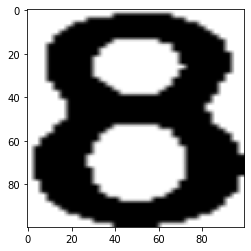

Detected:  8
Probability:  0.9973001


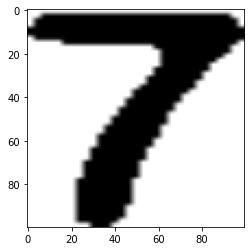

Detected:  7
Probability:  0.9999999


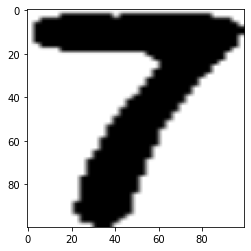

Detected:  7
Probability:  0.99999976


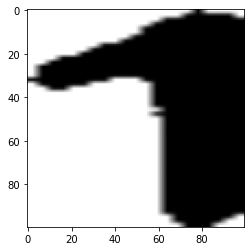

Detected:  1
Probability:  0.9893462


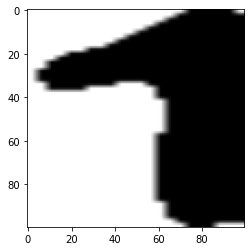

Detected:  1
Probability:  0.9742469


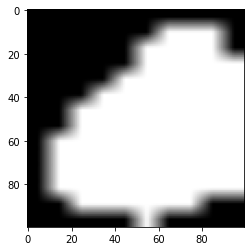

Detected:  6
Probability:  0.87261665


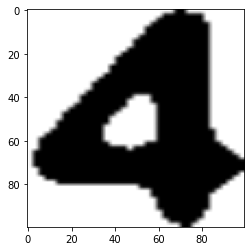

Detected:  4
Probability:  0.9999993


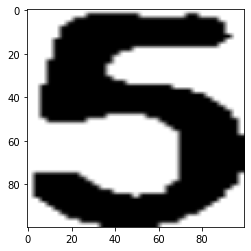

Detected:  5
Probability:  0.99999404


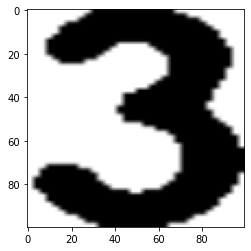

Detected:  3
Probability:  0.99916184


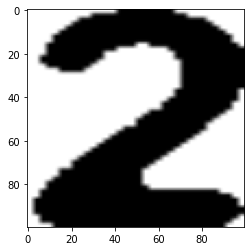

Detected:  2
Probability:  0.9954797


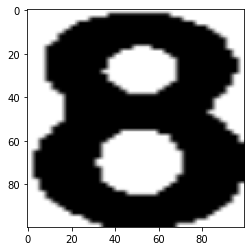

Detected:  8
Probability:  0.99415565


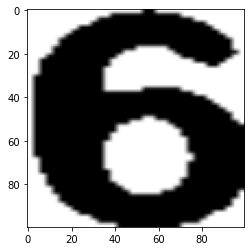

Detected:  6
Probability:  0.99902046


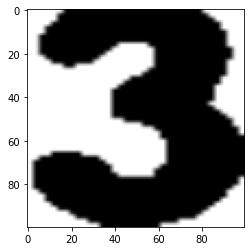

Detected:  3
Probability:  0.9581045


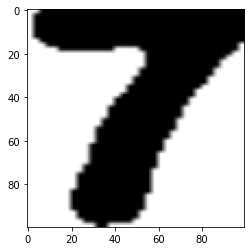

Detected:  7
Probability:  0.99999976


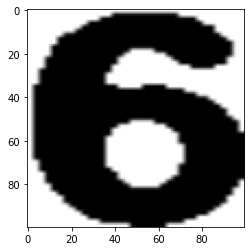

Detected:  6
Probability:  0.9766583


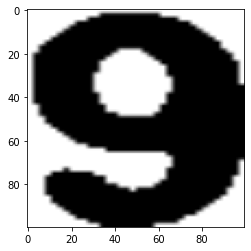

Detected:  9
Probability:  0.99999225


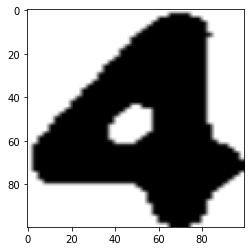

Detected:  4
Probability:  0.9999969


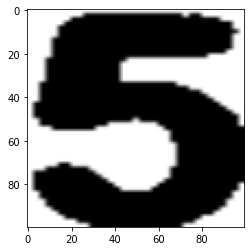

Detected:  5
Probability:  0.9999726


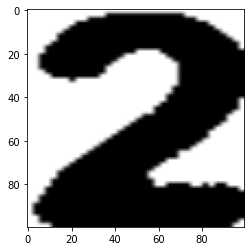

Detected:  2
Probability:  0.60325223


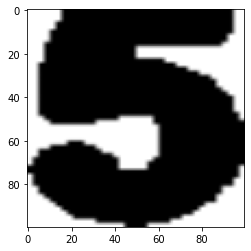

Detected:  5
Probability:  0.9999889


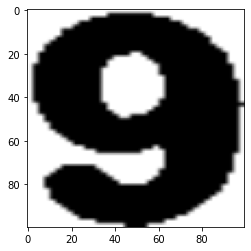

Detected:  9
Probability:  0.99997306


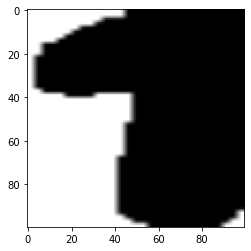

Detected:  1
Probability:  0.99999094


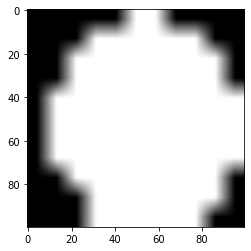

Detected:  2
Probability:  0.9957824


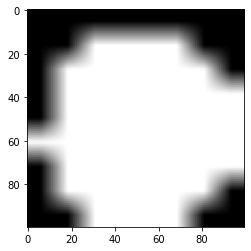

Detected:  2
Probability:  0.85166895


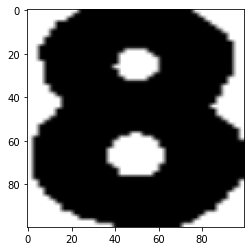

Detected:  5
Probability:  0.665308


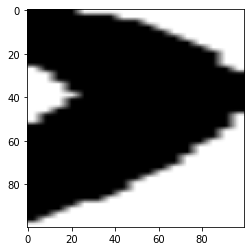

Detected:  2
Probability:  0.93170255


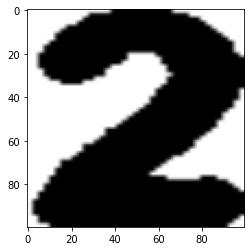

Detected:  3
Probability:  0.378268


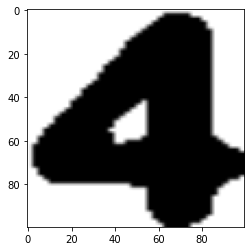

Detected:  4
Probability:  0.9999881


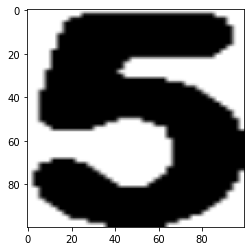

Detected:  5
Probability:  0.99999523


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [4]:
while True:
    success, img = cap.read()
    # Turning the original image to canny.
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray,(5,5),3)
    imgCanny = cv2.Canny(imgBlur,50,50)
    img_copy = img.copy()
    
    
    
    
    img_contours = img.copy()
    # Getting the countours
    getContours(imgCanny, img_copy)
    
    cv2.imshow('Webcam',img_copy)
    
    
    
    #cv2.imshow('Webcam',img_contours)
    if cv2.waitKey(1) & 0xff == ord('q'):
        cv2.destroyAllWindows()
        break
        